# Pymaceuticals Inc.
---

### Analysis

- There are 10 treatments used for the study.
- Capomulin is the most used treatment with the highest number of mice in the study.
- Propriva is the least used treatment with the lowest number of mice in the study.
- In reference of the box plot for four regimens and tumor volumes, the final tumor volume treated by Ramicane and Capomulin trended lower.
- Ramicane showed lowest final tumor volume, however it was used with lower treatment than Capomulin.
- Capomulin was used on Mouse ID509 and tumor volume decreased with time.
- The correlation between mouse weight and the average observed tumor volume for entire Capomulin regimen is 0.84 means that there is a positive correlation between average weight and final tumor volume.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_count=len(data_complete["Mouse ID"].unique())
mice_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_complete[data_complete.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()
print(duplicate_mice_ids)
print(duplicate_mice["Mouse ID"].dtype)

['g989']
object


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data_complete[data_complete["Mouse ID"].isin(duplicate_mice_ids)]
duplicate_mouse_df = pd.DataFrame(duplicate_mouse_data)


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = data_complete[data_complete["Mouse ID"].isin(duplicate_mice_ids)==False]
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count=len(clean_mouse_data["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

means=clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians=clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances=clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdevs=clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems=clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_stats_df=pd.DataFrame({"Mean Tumor Volume":means, "Median Tumor Volume":medians, "Tumor Volume Variance": variances, "Tumor Volume Std. Dev.":stdevs, "Tumor Volume Std. Err":sems})

summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats=clean_mouse_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats=summary_stats.rename(columns={"mean":"Mean Tumor Volume", "median":"Median Tumor Volume", "var":"Tumor Volume Variance", "std":"Tumor Volume Std. Dev.", "sem":"Tumor Volume Std. Err."})
summary_stats

# Using the aggregation method, produce the same summary statistics in a single line


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[]

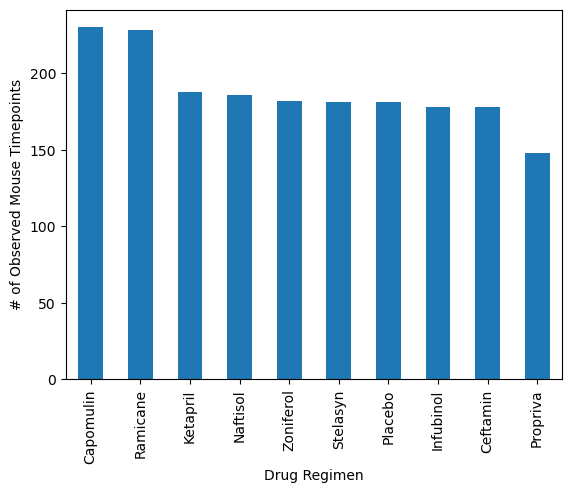

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_mouse_data['Drug Regimen'].value_counts()

bar_chart = drug_counts.plot(kind='bar')
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("# of Observed Mouse Timepoints")

bar_chart.plot()


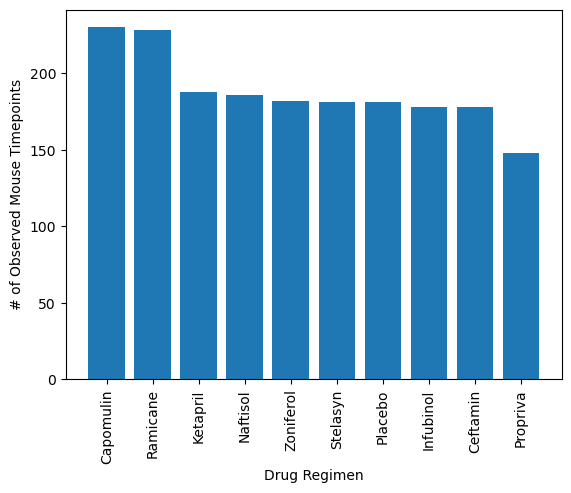

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_counts.index.values, drug_counts, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

[]

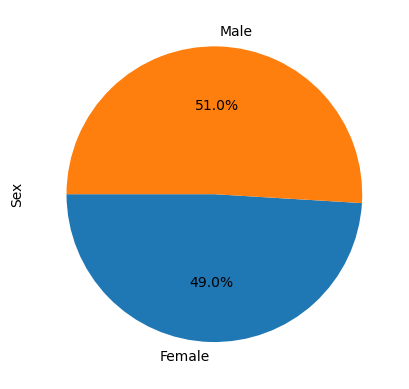

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex= clean_mouse_data.groupby('Sex')
sex_counts = mouse_sex['Sex'].count()
sex_counts

sex_count_chart = sex_counts.plot(kind='pie', y='Sex', autopct="%1.1f%%", startangle=180)
sex_count_chart.plot()

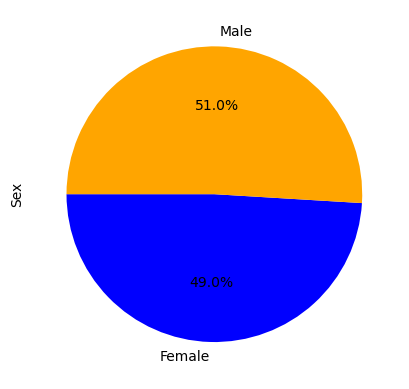

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
members = [958, 922]
colors = ["blue", "orange"]

plt.pie(sex_counts, labels=sex, autopct="%1.1f%%", colors=colors, startangle=180)
plt.ylabel('Sex') 
plt.show()

## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_mouse_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoints_df = last_timepoints.reset_index()
last_timepoints_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_last_df= pd.merge(clean_mouse_data, last_timepoints_df, how='right', on=('Mouse ID', 'Timepoint'))

merged_last_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

for treatment in treatments: 
    tumor_volumes = merged_last_df.loc[merged_last_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"---------------------------------")
    print(f"Results for {treatment} treatment:")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    tumor_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s tumor outliers: {tumor_outliers}")

---------------------------------
Results for Capomulin treatment:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin's tumor outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------
Results for Ramicane treatment:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane's tumor outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
---------------------------------
Results for Infubinol treatment:
The lower quartile of tumor 

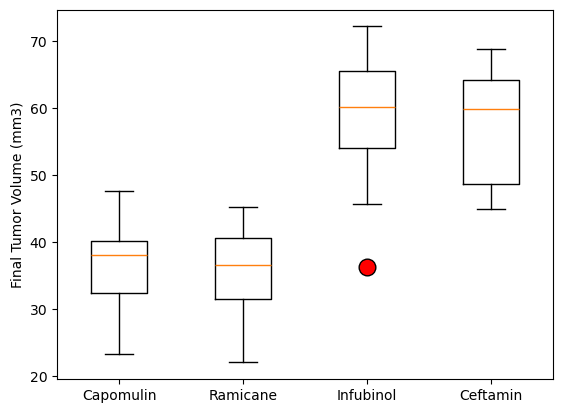

In [54]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data = []

for treatment in treatments:
    tumor_volumes = merged_last_df.loc[merged_last_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)

fig, ax = plt.subplots()
red_circle = dict(markerfacecolor='r', marker='o', markersize = '12')
ax.boxplot(tumor_vol_data, labels=treatments, flierprops=red_circle)

ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

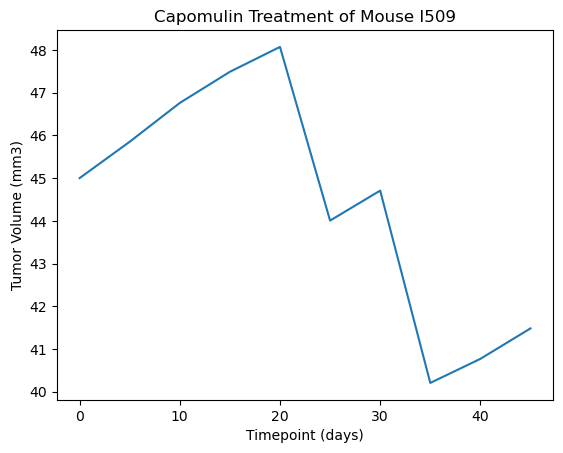

In [58]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Specify the treatment regimen and mouse ID
treatment = "Capomulin"
mouse_id = "I509"

# Make and design line plot
mouse_capomulin = clean_mouse_data.loc[clean_mouse_data['Mouse ID'] == 'l509']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'])

# Labels
plt.title("Capomulin Treatment of Mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

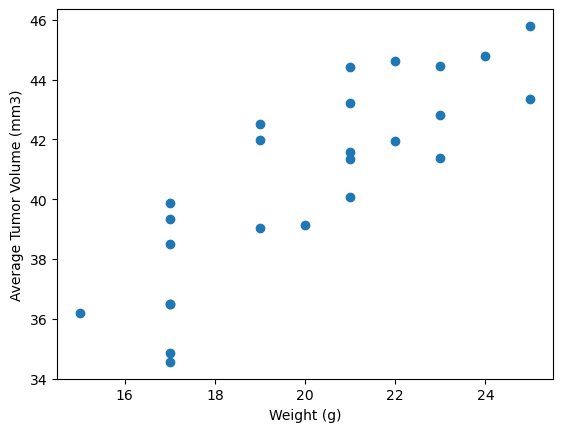

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]

# Tumor volume per mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Weight per mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Generate a scatterplot
x_values = mouse_weight
y_values = avg_tumor_volume
plt.scatter(x_values,y_values)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation between mouse weight and the average observed tumor volume for entire Capomulin regimen is {round(st.pearsonr(mouse_weight, avg_tumor_volume)[0],2)}")

The correlation between mouse weight and the average observed tumor volume for entire Capomulin regimen is 0.84


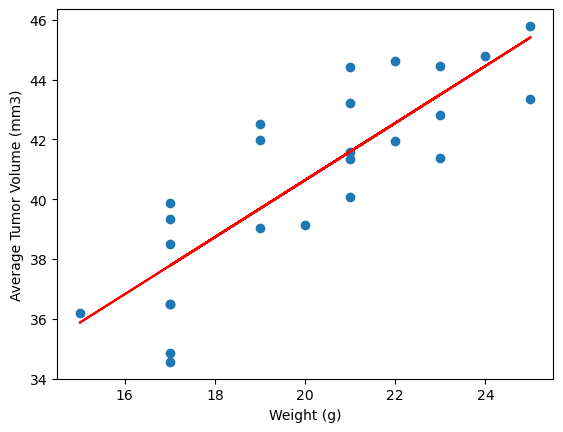

In [66]:
from scipy.stats import linregress

x_values = mouse_weight
y_values = avg_tumor_volume

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
